In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
from importlib import reload

import seaborn as sns
sns.set(color_codes=True,rc={'figure.figsize':(11.7,8.27)})

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(42000, 785)

In [4]:
train.drop_duplicates().shape

(42000, 785)

In [5]:
train.isnull().sum().unique()

array([0], dtype=int64)

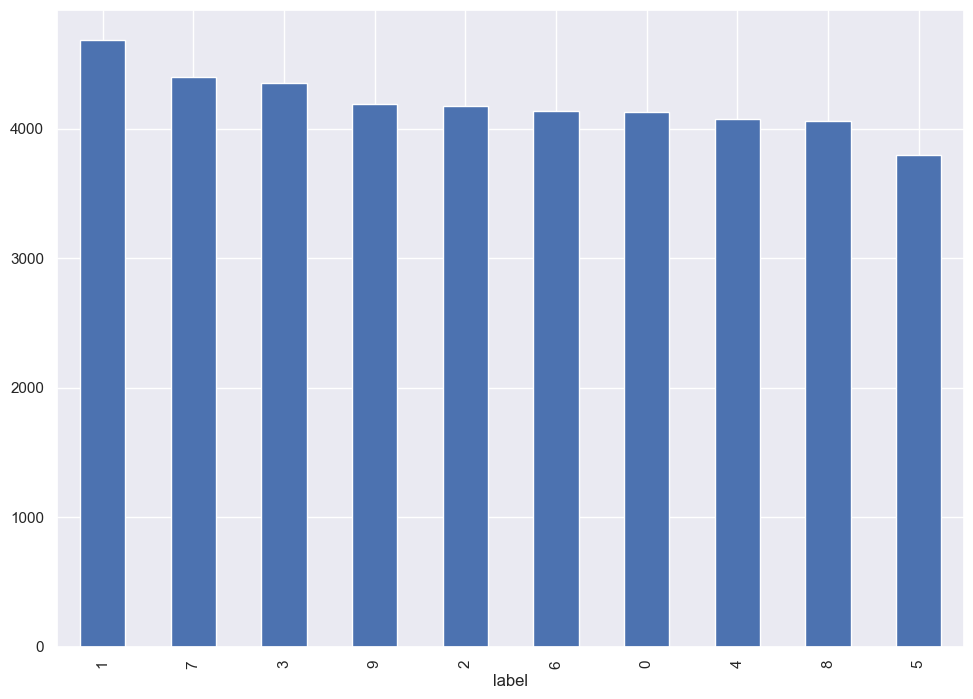

In [8]:
train['label'].value_counts().plot(kind='bar');

Нет nan-значений, нет дубликатов, равное распределние групп

## Начальная модель ##

In [11]:
X = train.drop('label', axis=1)
y = train['label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

accuracy_score(y_test, dtc.predict(X_test))

0.8505952380952381

## TSVD и t-SNE ##

In [16]:
df = pd.concat([train, test])

In [18]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=50).fit_transform(df.drop('label', axis=1))

In [21]:
train_tsvd = pd.DataFrame(tsvd[:len(train)])
test_tsvd = pd.DataFrame(tsvd[len(train):])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_tsvd, y, test_size=0.2, random_state=17)

In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

accuracy_score(y_test, dtc.predict(X_test))

0.833452380952381

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_tsne = tsne.fit_transform(tsvd)

In [33]:
train_tsne = pd.DataFrame(X_tsne[:len(train)], columns=['first_component', 'second_compomemt'])
test_tsne = pd.DataFrame(X_tsne[len(train):], columns=['first_component', 'second_compomemt'])

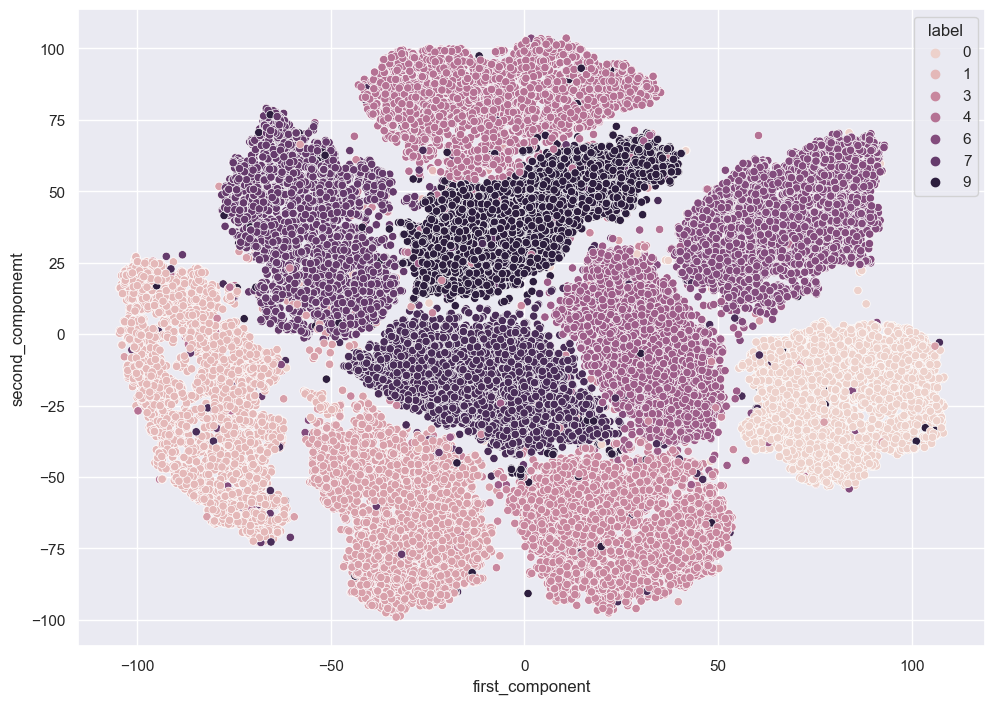

In [43]:
sns.scatterplot(data=train_tsne, x='first_component', y='second_compomemt', hue=y);

In [44]:
X_train, X_test, y_train, y_test = train_test_split(train_tsne, y, test_size=0.2, random_state=17)

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
accuracy_score(y_test, dtc.predict(X_test))

0.9691666666666666

In [47]:
pred = dtc.predict(test_tsne)
Submission = pd.DataFrame({
        "ImageId": range(1, pred.shape[0]+1),
        "Label": pred
    })

Submission.to_csv("TSNESubmission.csv", index=False)

Submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


Score = 0.962